<a href="https://colab.research.google.com/github/gegretel/AML7/blob/master/project7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")# 

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [72]:
%ls /content

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
ls: cannot access '/content/gdrive': Transport endpoint is not connected
drive/  gdrive/  sample_data/


In [73]:
%ls

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
ls: cannot open directory '.': Transport endpoint is not connected


In [74]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
import os
os.chdir("/content/gdrive/My Drive/")

In [76]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf


from keras.models import Sequential
from keras.layers import LSTM,Dense


from keras.models import load_model

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

/content/gdrive: ['.shortcut-targets-by-id', 'My Drive', '.Trash']
/content/gdrive/My Drive: ['Getting started.pdf', 'ESL Outline.doc', 'ESL Outline.doc.gdoc', 'Lab6.html', 'Sponsorship Proposal (2).pdf', '2019 四校春晚赞助合作计划书FIN.pdf', 'IMG_3091.jpg', 'Ticket BackSide_v2-新 (1).jpg', 'Ticket Design_v2.jpg', 'Ticket Design_VIP_v2.jpg', 'Ticket BackSide_v2-新 (1).psd', 'Ticket Design_v2.psd', 'Ticket Design_VIP_v2.psd', 'Ticket BackSide_v2-新.jpg', 'Ticket BackSide_v2-新.psd', '1&4  00 (1).psd', '2&3.psd', '中国蓝小记者访美VCR-1 mp4版VA0.mp4', 'SJU学联拜年视频.MP4', '万茜.MP4', 'SJU CS教授AMEEN拜年视频.MP4', '小红书网红 是你的剧老板.MP4', '喻恩泰.MP4', '涂松岩.MP4', '“知否伴奏.mp3”的副本', '23页改 (1).rar', '23页改.rar', '1&4  00.jpg', '1&4  00.psd', '中国蓝小记者访美VCR-2 mp4版VA0.mp4', 'iot sos_video.MOV', 'diodes2.zip', '农民专业合作社政府促进法律制度的研究.gdoc', 'iot rainbow.zip', '现代操作系统  原书第4版@www.java1234.com.pdf', 'traffic3.MOV', 'chaser.ino', 'blink.mp4', 'chaser.mp4', 'diode.txt', 'led.asc', 'led.png', 'RGB.ino', 'RGB (3).mp4', 'RGB (2).mp4', 'RGB (1).mp4', 'RG

# **Prediction of Closing Price of Stock LSTM**

In [122]:
#open the csv, chose company_N, where N = {A, B, C or D}
df = pd.read_csv('./Colab Notebooks/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/25/2019,206.830002,207.759995,205.119995,205.279999,202.627808,18543200
1,4/26/2019,204.899994,205.000000,202.119995,204.300003,201.660461,18649100
2,4/29/2019,204.399994,205.970001,203.860001,204.610001,201.966461,22204700
3,4/30/2019,203.059998,203.399994,199.110001,200.669998,198.077362,46534900
4,5/1/2019,209.880005,215.309998,209.229996,210.520004,207.800110,64827300


## **Data visualization**

In [123]:
df_new = df
#set date as index
df_new['Date'] = pd.to_datetime(df_new['Date'])
df_new.set_index('Date', inplace=True)
#keep only the 'Close' column
df_new = df['Close']

df_new.head()

Date
2019-04-25    205.279999
2019-04-26    204.300003
2019-04-29    204.610001
2019-04-30    200.669998
2019-05-01    210.520004
Name: Close, dtype: float64

In [127]:
len(df_new)

253

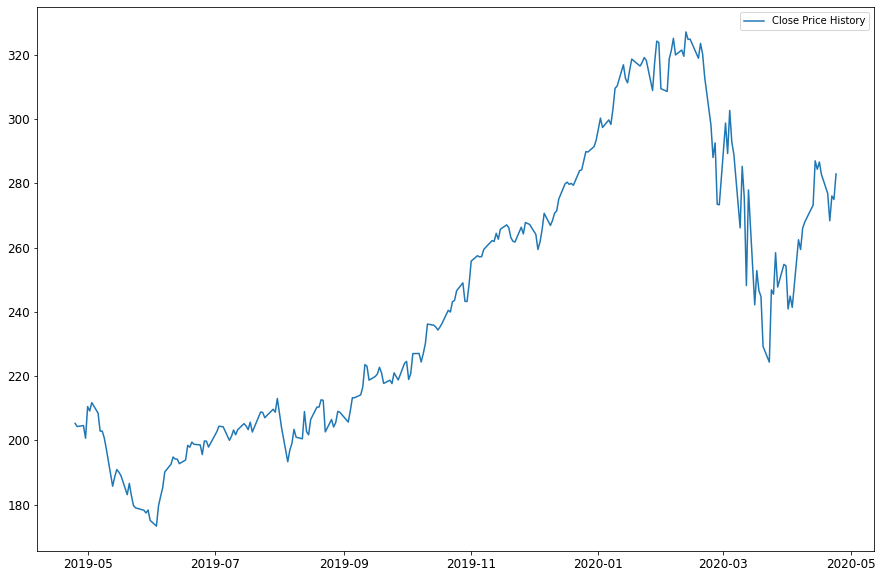

In [129]:
plt.figure(figsize = (15,10))
plt.plot(df_new, label='Close Price History')
plt.legend(loc='best')
plt.show()

## **Data normalization**

In [103]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

203

In [104]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.20779723],
       [0.20142949],
       [0.20344377],
       [0.17784271],
       [0.24184535],
       [0.2329434 ],
       [0.24983752],
       [0.22858993],
       [0.19207275],
       [0.19233261],
       [0.17816762],
       [0.15516562],
       [0.08070174],
       [0.09980507],
       [0.11448989],
       [0.10903183],
       [0.10201427],
       [0.06361269],
       [0.08641977],
       [0.06159841],
       [0.04132554],
       [0.03684209],
       [0.03203374],
       [0.02651073],
       [0.03248863],
       [0.011501  ],
       [0.        ],
       [0.04119555],
       [0.06003892],
       [0.07745287],
       [0.10948661],
       [0.12527614],
       [0.13976604],
       [0.13573748],
       [0.13547752],
       [0.1263158 ],
       [0.13378814],
       [0.16341776],
       [0.15964906],
       [0.16998052],
       [0.16556202],
       [0.16426249],
       [0.14470437],
       [0.17218972],
       [0.17179987],
       [0.15997397],
       [0.18356074],
       [0.191

**Split the data in Data to Train/Validate the LSTM and Data to Test the model**

In [105]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.20779723, 0.20142949, 0.20344377, 0.17784271, 0.24184535,
       0.2329434 , 0.24983752, 0.22858993, 0.19207275, 0.19233261,
       0.17816762, 0.15516562, 0.08070174, 0.09980507, 0.11448989,
       0.10903183, 0.10201427, 0.06361269, 0.08641977, 0.06159841,
       0.04132554, 0.03684209, 0.03203374, 0.02651073, 0.03248863,
       0.011501  , 0.        , 0.04119555, 0.06003892, 0.07745287,
       0.10948661, 0.12527614, 0.13976604, 0.13573748, 0.13547752,
       0.1263158 , 0.13378814, 0.16341776, 0.15964906, 0.16998052,
       0.16556202, 0.16426249, 0.14470437, 0.17218972, 0.17179987,
       0.15997397, 0.18356074, 0.19122801, 0.20214424, 0.2009746 ,
       0.17361923, 0.18154646, 0.19447688, 0.18486027, 0.19493176,
       0.20734244, 0.20272901, 0.19525667, 0.2102664 , 0.19031833])]
[0.220402833114844]

[array([0.20779723, 0.20142949, 0.20344377, 0.17784271, 0.24184535,
       0.2329434 , 0.24983752, 0.22858993, 0.19207275, 0.19233261,
       0.17816762, 0.15516562, 0.0807

In [0]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [107]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(143, 60, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [110]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
143/143 [==============================] - 5s 38ms/step - loss: 0.0141


In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [0]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [115]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

23.69631469560734

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


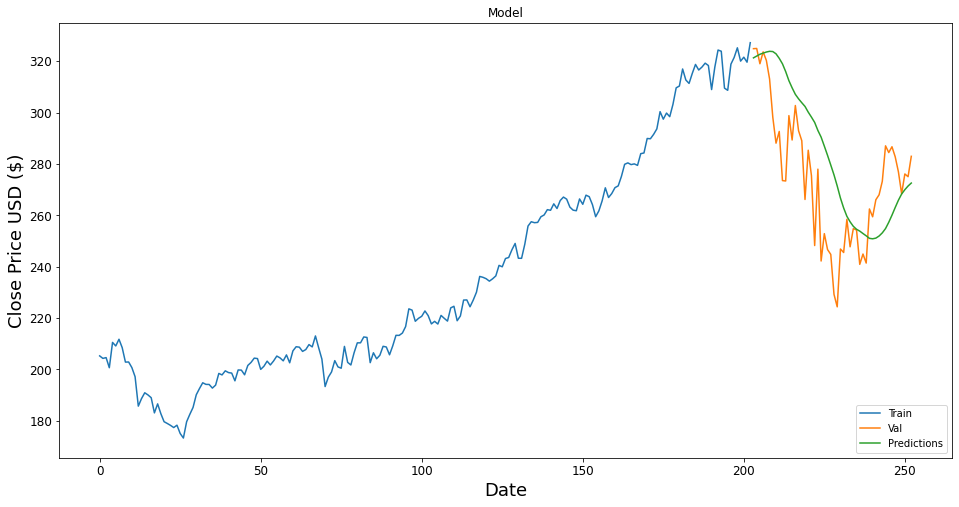

In [116]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [117]:
#Show the valid and predicted prices
valid

,Close,Predictions
203,324.869995,321.295227
204,324.950012,321.996796
205,319.000000,322.688995
206,323.619995,323.136383
207,320.299988,323.562622
208,313.049988,323.840973
209,298.179993,323.748535
210,288.079987,322.867828
211,292.649994,321.105835
212,273.519989,318.968414
